<a href="https://colab.research.google.com/github/QuangHPV/sc1015-project/blob/main/3_Logistic_Regression_Weather_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Weather_AUS dataset

In this notebook, I will use Logistic Regression for processing the Weather_AUS dataset

## Load the dataset

In [1]:
!git clone https://github.com/QuangHPV/sc1015-project.git

Cloning into 'sc1015-project'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 2), reused 20 (delta 1), pack-reused 0
Receiving objects: 100% (27/27), 8.56 MiB | 7.21 MiB/s, done.
Resolving deltas: 100% (2/2), done.


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Import specific model
from sklearn.linear_model import LogisticRegression

# Preprocess

In [4]:
df = pd.read_csv('/content/sc1015-project/data/weatherAUS_cleaned.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,3.84,7.76,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.04,9.82,14,44.0,6,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.52,9.50,15,46.0,13,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,3.52,8.54,4,24.0,9,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.44,10.46,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [5]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [7]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,12.192433,23.216219,2.351830,5.140667,8.101176,8.09360,39.744036,6.999526,7.798852,...,68.933958,51.553371,1017.778522,1015.409354,5.428186,5.526055,16.973123,21.694656,0.219167,0.219146
std,14.228687,6.376015,7.098887,8.397254,3.337079,2.965555,4.69411,13.300729,4.515839,4.538135,...,18.925838,20.575507,6.838559,6.783088,2.583504,2.424496,6.479501,6.882316,0.413683,0.413669
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,11.000000,7.600000,18.000000,0.000000,3.200000,6.900000,4.00000,31.000000,3.000000,4.000000,...,57.000000,37.000000,1013.400000,1010.900000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000
50%,24.000000,12.000000,22.600000,0.000000,4.660000,8.780000,9.00000,37.000000,7.000000,8.000000,...,70.000000,52.000000,1017.800000,1015.400000,7.000000,7.000000,16.700000,21.200000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,0.800000,6.240000,10.020000,13.00000,46.000000,11.000000,12.000000,...,83.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,21.500000,26.300000,0.000000,0.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.00000,135.000000,15.000000,15.000000,...,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


# Create a numerical dataset

In [8]:
categorical_columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']
for col in categorical_columns:
    unique_labels = df[col].unique()
    print(f'Unique labels in {col}', unique_labels)

Unique labels in Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Unique labels in Location [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
Unique labels in WindGustDir [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]
Unique labels in WindDir9am [13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]
Unique labels in WindDir3pm [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]
Unique labels in RainToday [0 1]
Unique labels in RainTomorrow [0 1]
Unique labels in Cloud9am [8. 7. 1. 0. 5. 4. 2. 6. 3. 9.]
Unique labels in Cloud3pm [7. 2. 8. 1. 5. 4. 6. 3. 0. 9.]


In [10]:
df_numerical = df.drop(columns=categorical_columns)
df_numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,3.84,7.76,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,5.04,9.82,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,25.7,0.0,4.52,9.50,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,28.0,0.0,3.52,8.54,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,32.3,1.0,4.44,10.46,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7


## Problem Solving
From the numerical dataset, I will create a Logistic Regression Model for predicting whether today is raining or not. The Model is trying to do the binary classfy whether today is raining or not, by fitting a curved line to the datset  

For better prediction, I will use Standard Scaler to Normalize data, make the model easier to learn from our cleaned numerical dataset

In [15]:
X = df_numerical
y = df['RainToday']
print('Len of X', len(X))
print('Len of y', len(y))

Len of X 145460
Len of y 145460


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predictions

In [20]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

# Evaluating our model

To evaluate our model, I will use the accuracy score to evaluate it. Then I also use Confusion matrix to evaluate, and give some insights about our result

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9630482606902241

As our data has been cleanned quite well, the accuracy for the model logistic regression is really good, eventhough the capcacity of logistic regression is not really high.

Then, I will use confusion matrix to see which part of our model is weak.

In [24]:
# utils for visualization
def visualize_preds(y_true, y_pred, title):
    ls = []
    f = plt.figure(figsize = (8,8))
    cf = confusion_matrix(y_true, y_pred)
    sns.heatmap(cf, fmt='.0f', annot=True)

    accuracy  = np.trace(cf) / float(np.sum(cf))

    # Metrics for Binary Confusion Matrices
    if sum(cf[:,1]) == 0:
        precision = 0.0;
    else:
        precision = cf[1,1] / sum(cf[:,1])

    if sum(cf[1,:]) == 0:
        recall = 0.0;
    else:
        recall    = cf[1,1] / sum(cf[1,:])

    if (precision + recall) == 0:
        f1_score = 0.0;
    else:
        f1_score  = 2 *precision * recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy,precision,recall,f1_score)

    ls.append(accuracy)
    ls.append(precision)
    ls.append(recall)
    ls.append(f1_score)
    ls = pd.DataFrame(ls)


    plt.xlabel('Predicted' + stats_text)
    plt.ylabel('Actual')
    plt.title(title)


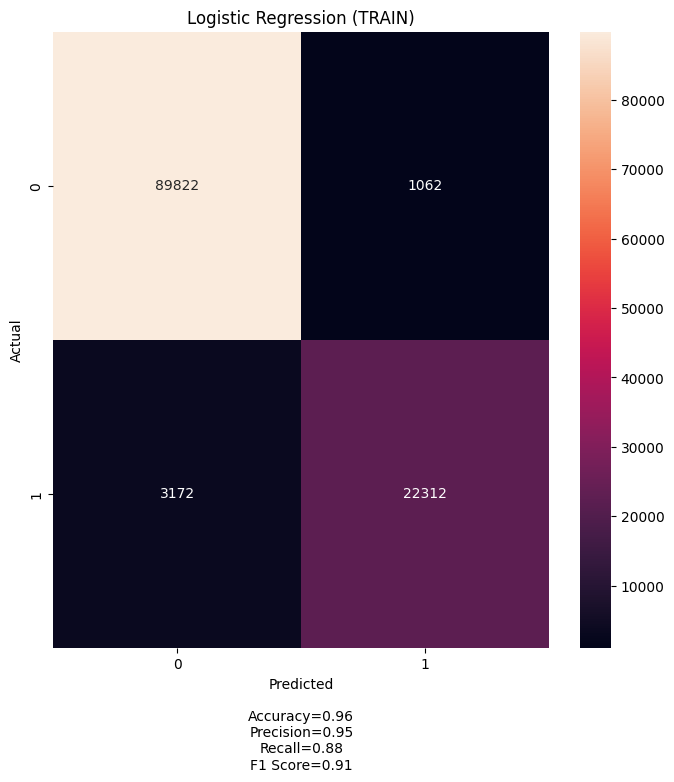

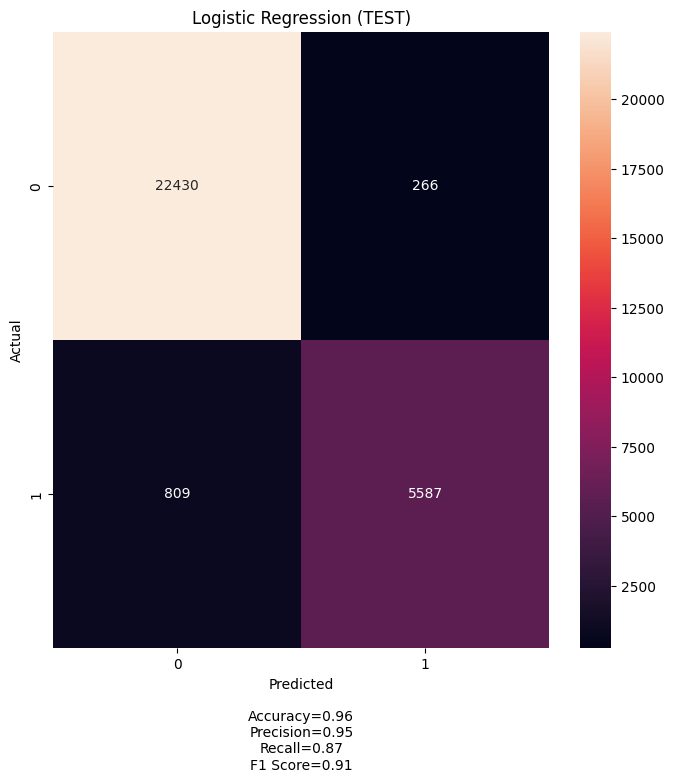

In [25]:
#Predict the data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Visualizing the data
visualize_preds(y_train,y_train_pred, title = 'Logistic Regression (TRAIN)')
visualize_preds(y_test,y_test_pred, title = 'Logistic Regression (TEST)')


From observation, our logistic regression model has many False Negative and False Positive, in both test set and train set. However, the F1 Score is still acceptable, as the model capacity is not really strong